In [8]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# CIFAR-10 DATASET SPLIT

In [9]:
(xtrain, ytrain) , (xtest, ytest) = cifar10.load_data()

# Visualizing the data

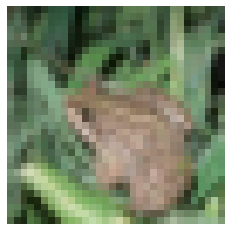

In [30]:
plt.imshow(xtest[4])
plt.axis('off')
plt.show()

# Normalizing the data

In [10]:
xtrain = xtrain/255
xtest = xtest/255
ytrain = to_categorical(ytrain, num_classes =10)
ytest = to_categorical(ytest, num_classes =10)

# Building CNN Model

In [19]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation = 'relu', input_shape =(32,32,3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3,3), activation ='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3), activation ='relu'))
model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

# Training model

In [20]:
model.compile(optimizer ='adam', loss="categorical_crossentropy",
             metrics=["accuracy"])
history = model.fit(xtrain, ytrain, epochs=10, validation_data= (xtest, ytest))

Epoch 1/10
1563/1563 [==============================] - 56s 35ms/step - loss: 1.5182 - accuracy: 0.4472 - val_loss: 1.2462 - val_accuracy: 0.5591
Epoch 2/10
1563/1563 [==============================] - 52s 33ms/step - loss: 1.1433 - accuracy: 0.5963 - val_loss: 1.0410 - val_accuracy: 0.6352
Epoch 3/10
1563/1563 [==============================] - 53s 34ms/step - loss: 0.9932 - accuracy: 0.6501 - val_loss: 1.0016 - val_accuracy: 0.6461
Epoch 4/10
1563/1563 [==============================] - 55s 36ms/step - loss: 0.9018 - accuracy: 0.6825 - val_loss: 0.9132 - val_accuracy: 0.6807
Epoch 5/10
1563/1563 [==============================] - 72s 46ms/step - loss: 0.8248 - accuracy: 0.7100 - val_loss: 0.9331 - val_accuracy: 0.6782
Epoch 6/10
1563/1563 [==============================] - 70s 45ms/step - loss: 0.7650 - accuracy: 0.7323 - val_loss: 0.8565 - val_accuracy: 0.7042
Epoch 7/10
1563/1563 [==============================] - 71s 45ms/step - loss: 0.7247 - accuracy: 0.7440 - val_loss: 0.8550 -

# Evaluation

In [21]:
testloss, testacc = model.evaluate(xtest, ytest)
print(testloss)
print(testacc)

313/313 [==============================] - 4s 12ms/step - loss: 0.8417 - accuracy: 0.7212
0.8417086005210876
0.7211999893188477


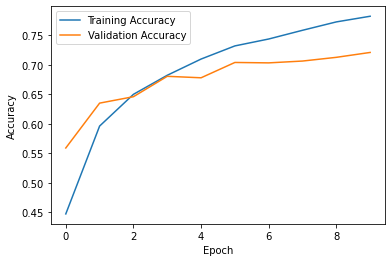

In [22]:
plt.plot(history.history['accuracy'], label = "Training Accuracy")
plt.plot(history.history['val_accuracy'], label = "Validation Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()